In [1]:
# Importing the modules

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd

df=pd.read_csv("airline-data-part-1.csv")
df.dropna(inplace = True)
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [4]:
df.shape


(103594, 25)

In [5]:
df.isna().sum()  #Missing values

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [6]:
#checking for number of unique values
df.nunique()

Unnamed: 0                           103594
id                                   103594
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [7]:
#statistical information
df.describe().T

count          mean           std   min  \
Unnamed: 0                         103594.0  51950.102274  29997.914016   0.0   
id                                 103594.0  64942.428625  37460.816597   1.0   
Age                                103594.0     39.380466     15.113125   7.0   
Flight Distance                    103594.0   1189.325202    997.297235  31.0   
Inflight wifi service              103594.0      2.729753      1.327866   0.0   
Departure/Arrival time convenient  103594.0      3.060081      1.525233   0.0   
Ease of Online booking             103594.0      2.756984      1.398934   0.0   
Gate location                      103594.0      2.977026      1.277723   0.0   
Food and drink                     103594.0      3.202126      1.329401   0.0   
Online boarding                    103594.0      3.250497      1.349433   0.0   
Seat comfort                       103594.0      3.439765      1.318896   0.0   
Inflight entertainment             103594.0      3.358341      1.333030   0.0   
On-board service                   103594.0      3.382609      1.288284   0.0   
Leg room service                   103594.0      3.351401      1.315409   0.0   
Baggage handling                   103594.0      3.631687      1.181051   1.0   
Checkin service                    103594.0      3.304323      1.265396   0.0   
Inflight service                   103594.0      3.640761      1.175603   0.0   
Cleanliness                        103594.0      3.286397      1.312194   0.0   
Departure Delay in Minutes         103594.0     14.747939     38.116737   0.0   
Arrival Delay in Minutes           103594.0     15.178678     38.698682   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         25960.25  51955.5  77924.75  103903.0  
id                                 32562.25  64890.0  97370.50  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    842.0   1743.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

##GRAPHS

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
# satisfaction distribution
df["satisfaction"].value_counts()




neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

Visualizing satisfaction distribution among passengers

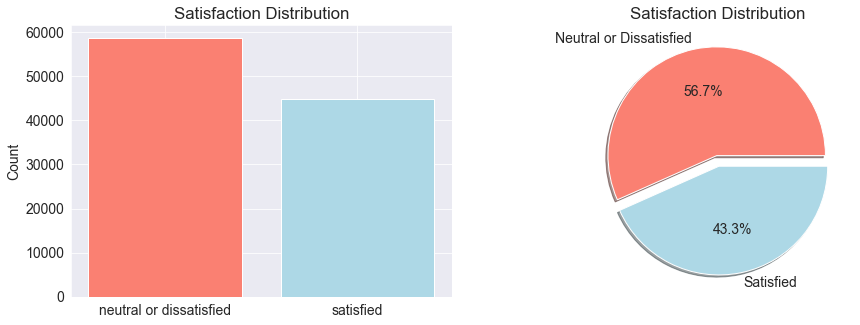

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Plot 1
ax1.bar(df["satisfaction"].value_counts().index, df["satisfaction"].value_counts(),color=["salmon", "lightblue"])
ax1.set(title="Satisfaction Distribution",ylabel="Count")

# Plot 2
ax2.pie(df["satisfaction"].value_counts(),colors=["salmon", "lightblue"],
        labels= ["Neutral or Dissatisfied", "Satisfied"] , 
        autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=0, shadow = True)
ax2.set(title="Satisfaction Distribution");

#Gender differences in customer satisfaction

In [11]:
#gender ratio
df['Gender'].value_counts()

Female    52576
Male      51018
Name: Gender, dtype: int64

In [12]:
#comparing target column with gender column
pd.crosstab(df['Gender'],df['satisfaction'])

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30107      22469
Male                            28590      22428

In [13]:
# checking percentages
pd.crosstab(df['Gender'],df['satisfaction'],normalize = True)*100

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      29.062494  21.689480
Male                        27.598123  21.649903

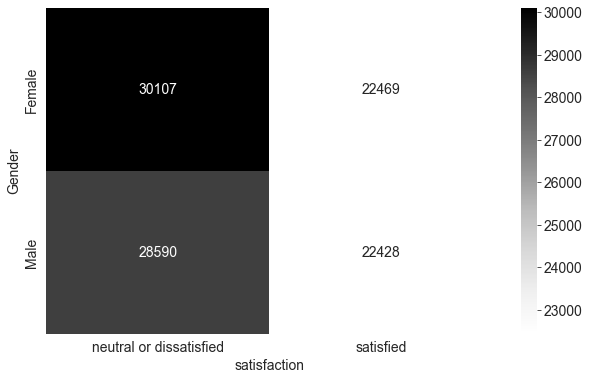

In [14]:
# Visualise this crosstabulated data

sns.heatmap(pd.crosstab(df['Gender'], df['satisfaction']),annot=True, cmap='Greys', cbar=True, fmt="d");

#Customer Satisfaction Ratio based on Customer Type

In [15]:
#Customer type ratio
df['Customer Type'].value_counts()

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

In [16]:
#crosstab
pd.crosstab(df['Customer Type'], df['satisfaction'])

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       44249      40413
disloyal Customer                    14448       4484

In [17]:
#percentages
pd.crosstab(df['Customer Type'], df['satisfaction'] ,normalize = True)*100

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   42.713864  39.010947
disloyal Customer                13.946754   4.328436

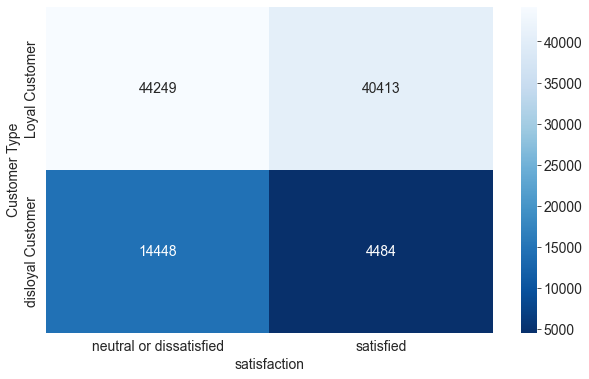

In [18]:
#visualise
sns.heatmap(pd.crosstab(df['Customer Type'], df['satisfaction']),annot=True, cmap='Blues_r', cbar=True, fmt="d");

#Customer satisfaction based on  type oftravel

In [19]:
#typenof travel
df['Type of Travel'].value_counts()

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64

In [20]:
pd.crosstab(df['Type of Travel'], df['satisfaction'])

satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                    29831      41634
Personal Travel                    28866       3263

In [21]:
pd.crosstab(df['Type of Travel'], df['satisfaction'], normalize = True)*100

satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                28.796069  40.189586
Personal Travel                27.864548   3.149796

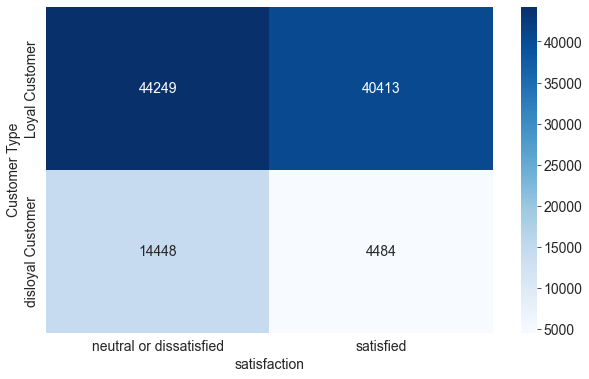

In [22]:

sns.heatmap(pd.crosstab(df['Customer Type'], df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

#Customer Satisfaction based on Class

In [23]:
df['Class'].value_counts()

Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64

In [24]:
pd.crosstab(df['Class'], df['satisfaction'])

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                        15143      34390
Eco                             37922       8671
Eco Plus                         5632       1836

In [25]:
pd.crosstab(df['Class'], df['satisfaction'], normalize = True)*100

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    14.617642  33.196903
Eco                         36.606367   8.370176
Eco Plus                     5.436608   1.772303

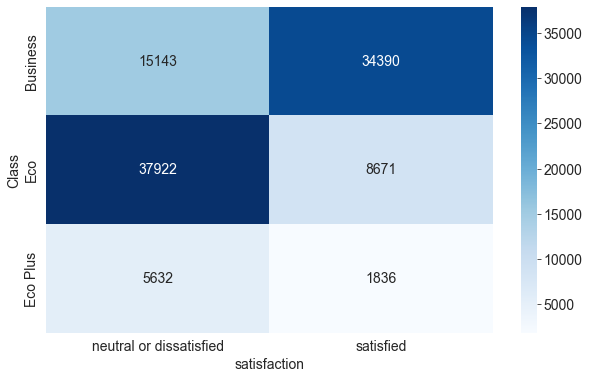

In [26]:
sns.heatmap(pd.crosstab(df['Class'], df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

#Custumer satisfaction ratio with respect to age

In [27]:
px.histogram(df, 
             x='Age', 
             title='Age vs Satisfaction Ratio',
             marginal='box',
             color='satisfaction')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'satisfaction=neutral or dissatisfied<br>Age=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'neutral or dissatisfied',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'neutral or dissatisfied',
              'offsetgroup': 'neutral or dissatisfied',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([13, 25, 25, ..., 30, 22, 27], dtype=int64),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'satisfaction=neutral or dissatisfied<br>Age=%{x}<extra></extra>',
              'legendgroup': 'neutral or dissatisfied',
              'marker': {'color': '#636efa'},
              'name': 'neutral or dissatisfied',
              'notched': True,
              'offsetgroup': 'neutral or dissatisfied',
              'showlegend': False,
              'type': 'box',
              'x': array([13, 25, 25, ..., 30, 22, 27], dtype=int64),
              'xaxis': 'x2',
              'yaxis': 'y2'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'satisfaction=satisfied<br>Age=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'satisfied',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'satisfied',
              'offsetgroup': 'satisfied',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([26, 61, 52, ..., 26, 60, 49], dtype=int64),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'satisfaction=satisfied<br>Age=%{x}<extra></extra>',
              'legendgroup': 'satisfied',
              'marker': {'color': '#EF553B'},
              'name': 'satisfied',
              'notched': True,
              'offsetgroup': 'satisfied',
              'showlegend': False,
              'type': 'box',
              'x': array([26, 61, 52, ..., 26, 60, 49], dtype=int64),
              'xaxis': 'x2',
              'yaxis': 'y2'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'satisfaction'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Age vs Satisfaction Ratio'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Age'}},
               'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0], 'matches': 'x', 'showgrid': True, 'showticklabels': False},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 0.7326], 'title': {'text': 'count'}},
               'yaxis2': {'anchor': 'x2',
                          'domain': [0.7426, 1.0],
                          'matches': 'y2',
                          'showgrid': False,
                          'showline': False,
                          'showticklabels': False,
                          'ticks': ''}}
})

# 6. Customer Satisfaction variation with respect to Customer Input

In [ ]:
customer_input_list = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

In [ ]:
def plot_func(a,b):
    for category in customer_input_list[a:b]:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        sns.countplot(x=df[category],palette="Pastel1")

        plt.subplot(1,2,2)
        sns.countplot(x=df[category],hue=df['satisfaction'], palette='autumn')
        plt.show()

1. Inflight wifi service
2. Departure/Arrival time convenient

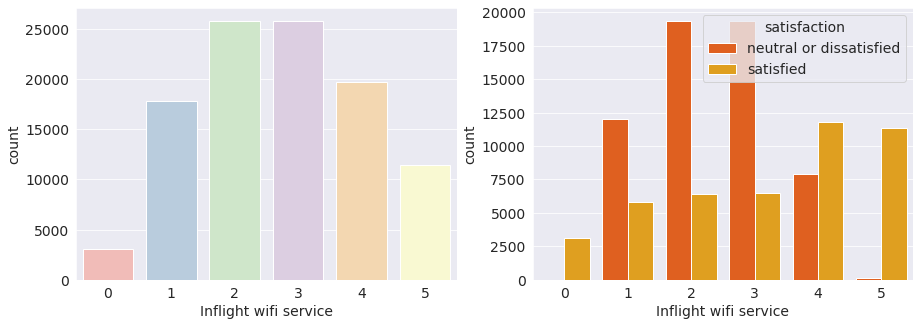

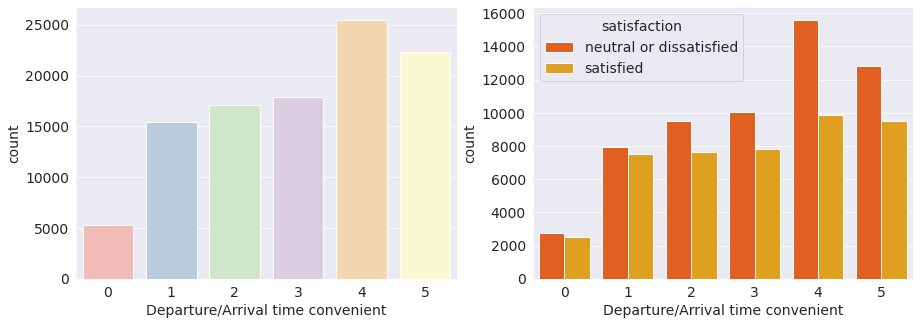

In [ ]:
plot_func(0, 2)

3. Ease of Online Booking
4. Gate Location

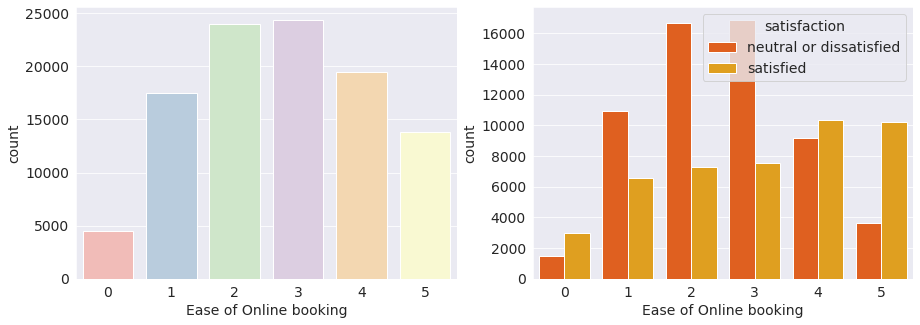

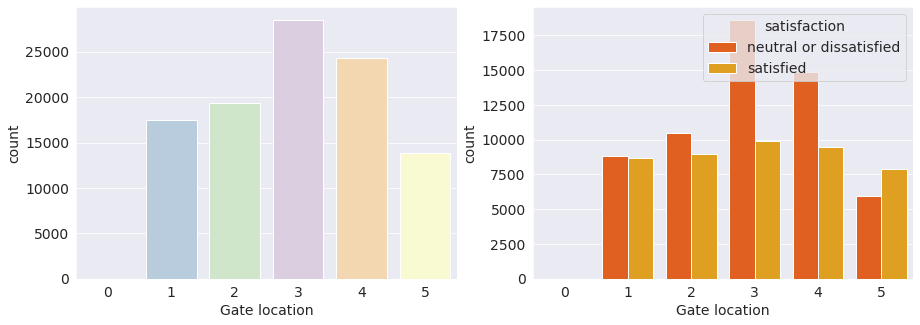

In [ ]:
plot_func(2, 4)

5. Food And Drink
6. Online Boarding

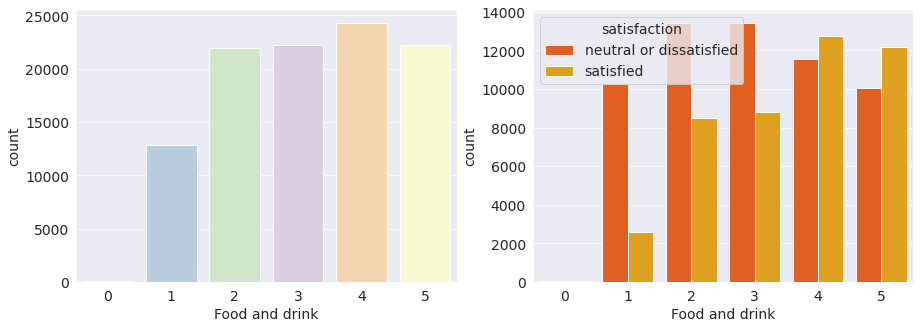

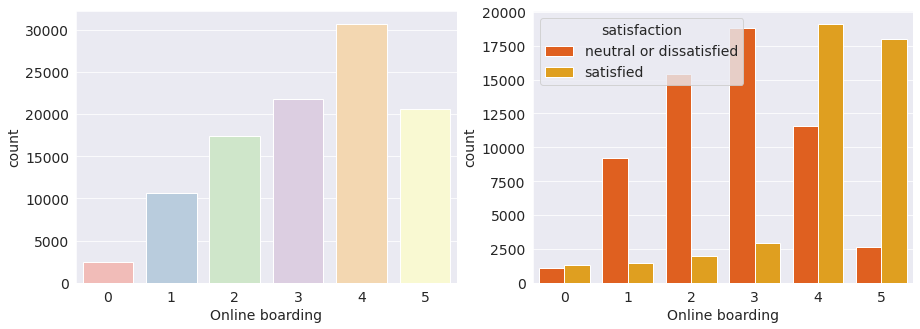

In [ ]:
plot_func(4, 6)

7. Seat comfort
8. Inflight Entertainment

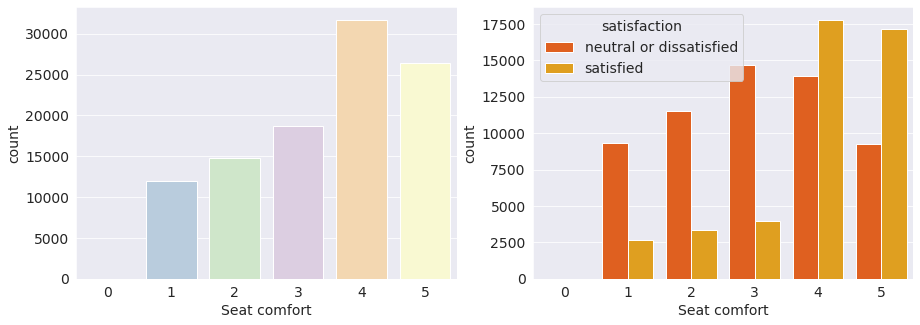

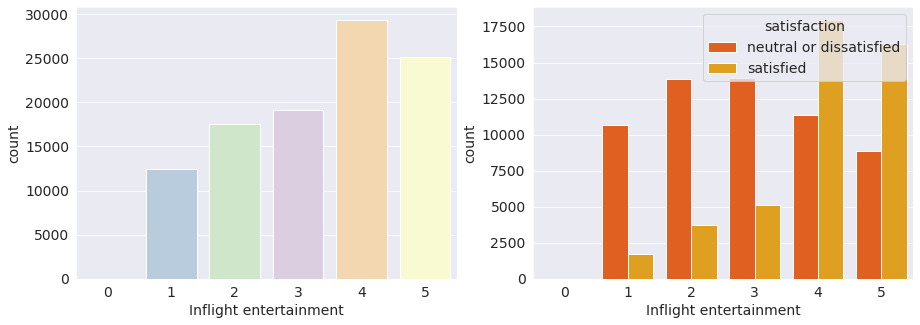

In [ ]:
plot_func(6, 8)

9. Onboard service
10. Leg room Service

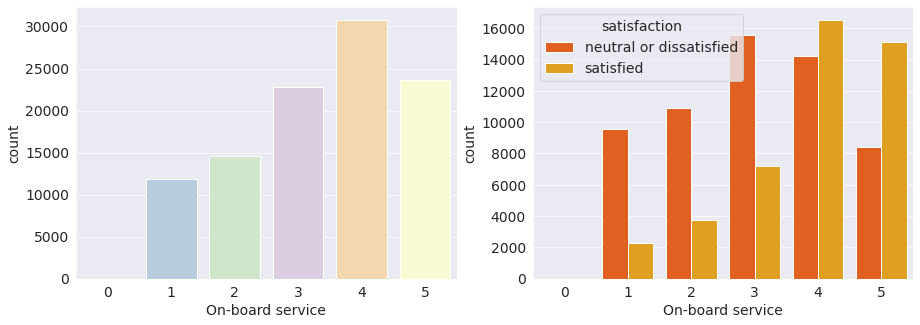

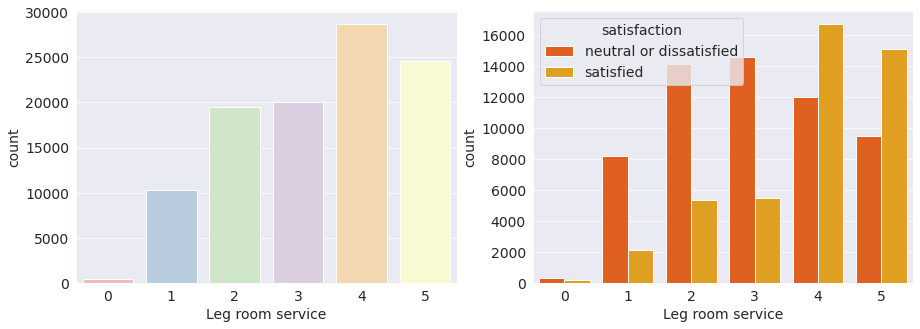

In [ ]:
plot_func(8, 10)

11. Baggage handling
12. Checking services

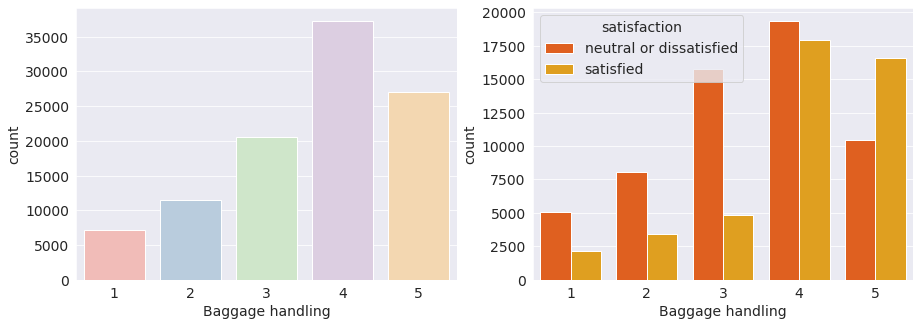

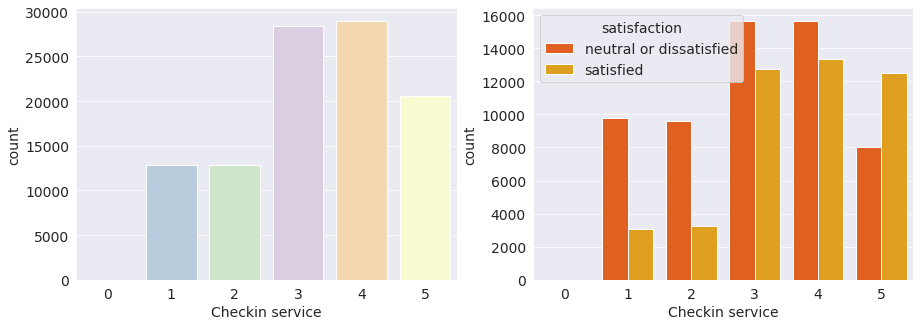

In [ ]:
plot_func(10, 12)

13. Inflight service
14. Cleanliness

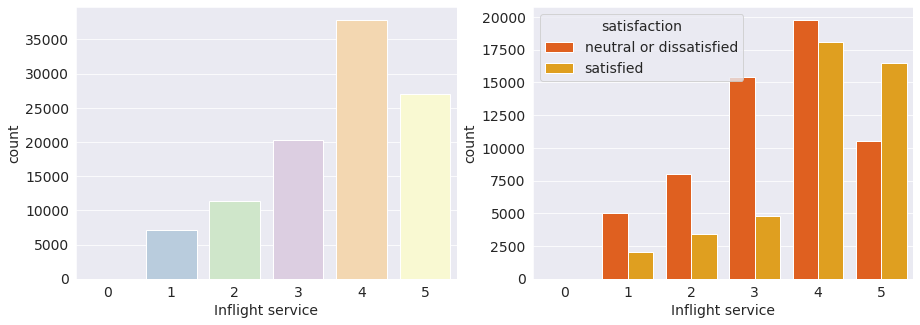

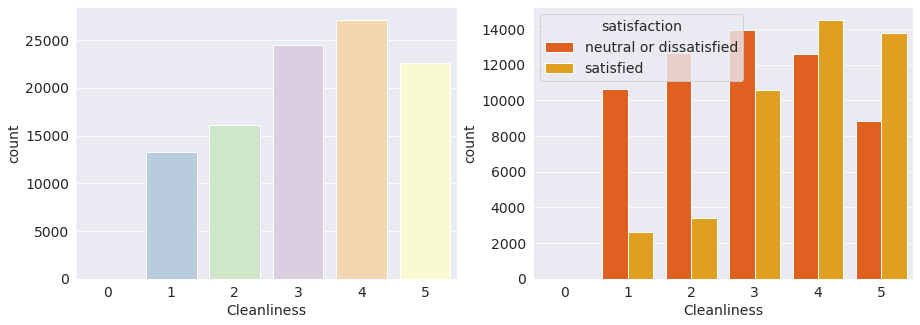

In [ ]:
plot_func(12, 14)

#Customer Satisfaction based on depature and arrival time delay

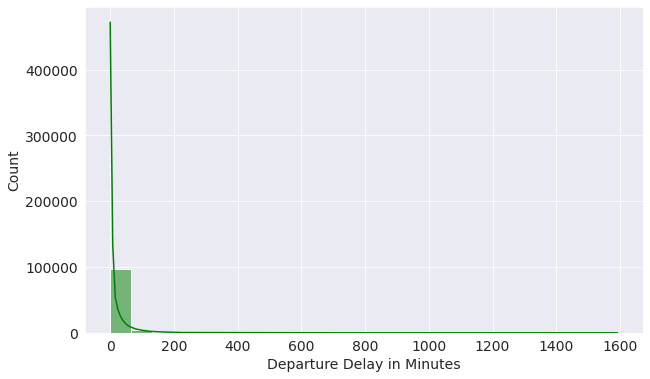

In [ ]:
# 7.1 For Departure Delay

sns.histplot(df["Departure Delay in Minutes"], bins=24,kde=True, color="Green");

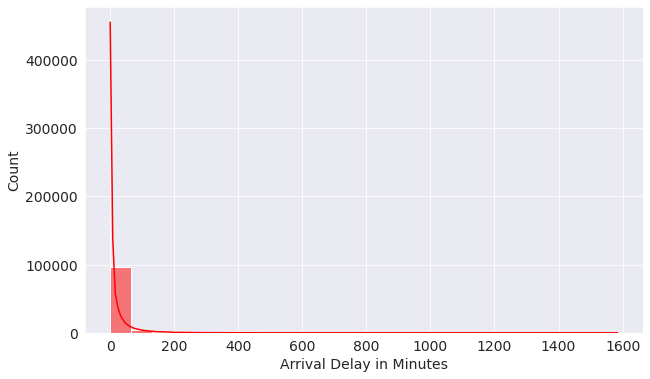

In [ ]:
# 7.2 For Arrival Delay

sns.histplot(df["Arrival Delay in Minutes"], bins=24,kde=True, color="Red");

#Data correlation
We'll look for covariance and correlation between the inputs and targets columns in this section. How they are related to one another and whether they have a positive or negative correlation.

Please keep in mind that correlation does not imply causation.

In [ ]:
# converting the traget column into numerical values to see the coorelation or covariance

df["satisfaction"]= df["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})
df.cov()

Unnamed: 0            id           Age  \
Unnamed: 0                         8.998748e+08  3.535048e+06   2179.013514   
id                                 3.535048e+06  1.403313e+09  12981.515606   
Age                                2.179014e+03  1.298152e+04    228.406556   
Flight Distance                    8.894151e+04  3.556020e+06   1504.779961   
Inflight wifi service             -1.004973e+02 -1.061396e+03      0.350589   
Departure/Arrival time convenient  3.429699e+01 -9.795617e+01      0.876806   
Ease of Online booking             8.145355e+01  7.398910e+02      0.517170   
Gate location                      1.919248e+02 -2.041923e+01     -0.030084   
Food and drink                    -7.871652e+01  6.247223e+01      0.460499   
Online boarding                    4.559507e+01  2.800192e+03      4.255875   
Seat comfort                       1.355878e+01  2.623087e+03      3.195236   
Inflight entertainment             5.896003e+01  1.294391e+02      1.538766   
On-board service                   4.040994e+01  2.666601e+03      1.112188   
Leg room service                   1.602429e+02  2.190764e+03      0.805092   
Baggage handling                  -1.160537e+01  3.324156e+03     -0.849974   
Checkin service                   -1.595997e+02  3.761202e+03      0.669403   
Inflight service                  -4.028637e-01  3.499700e+03     -0.886565   
Cleanliness                       -3.850603e+01  1.244296e+03      1.060843   
Departure Delay in Minutes        -7.934275e+02 -2.758867e+04     -5.847232   
Arrival Delay in Minutes          -5.239586e+01 -5.400671e+04     -7.104191   
satisfaction                      -6.766670e+01  2.539579e+02      1.026326   

                                   Flight Distance  Inflight wifi service  \
Unnamed: 0                            8.894151e+04            -100.497280   
id                                    3.556020e+06           -1061.396110   
Age                                   1.504780e+03               0.350589   
Flight Distance                       9.946018e+05               9.336387   
Inflight wifi service                 9.336387e+00               1.763229   
Departure/Arrival time convenient    -3.028268e+01               0.696215   
Ease of Online booking                9.165711e+01               1.329757   
Gate location                         6.030465e+00               0.570288   
Food and drink                        7.551360e+01               0.237610   
Online boarding                       2.896003e+02               0.818887   
Seat comfort                          2.071868e+02               0.214741   
Inflight entertainment                1.710236e+02               0.370856   
On-board service                      1.407373e+02               0.207818   
Leg room service                      1.755777e+02               0.280316   
Baggage handling                      7.446714e+01               0.189856   
Checkin service                       9.240634e+01               0.072551   
Inflight service                      6.733293e+01               0.172693   
Cleanliness                           1.218620e+02               0.231135   
Departure Delay in Minutes            7.244480e+01              -0.883242   
Arrival Delay in Minutes             -9.362198e+01              -0.981232   
satisfaction                          1.477259e+02               0.186985   

                                   Departure/Arrival time convenient  \
Unnamed: 0                                                 34.296993   
id                                                        -97.956172   
Age                                                         0.876806   
Flight Distance                                           -30.282684   
Inflight wifi service                                       0.696215   
Departure/Arrival time convenient                           2.326335   
Ease of Online booking                                      0.932472   
Gate location              

In [ ]:
df.corr()

Unnamed: 0        id       Age  \
Unnamed: 0                           1.000000  0.003146  0.004806   
id                                   0.003146  1.000000  0.022929   
Age                                  0.004806  0.022929  1.000000   
Flight Distance                      0.002973  0.095184  0.099838   
Inflight wifi service               -0.002523 -0.021338  0.017470   
Departure/Arrival time convenient    0.000750 -0.001714  0.038038   
Ease of Online booking               0.001941  0.014119  0.024461   
Gate location                        0.005007 -0.000427 -0.001558   
Food and drink                      -0.001974  0.001254  0.022920   
Online boarding                      0.001126  0.055394  0.208681   
Seat comfort                         0.000343  0.053091  0.160302   
Inflight entertainment               0.001474  0.002592  0.076380   
On-board service                     0.001046  0.055255  0.057123   
Leg room service                     0.004061  0.044459  0.040498   
Baggage handling                    -0.000328  0.075134 -0.047619   
Checkin service                     -0.004205  0.079346  0.035003   
Inflight service                    -0.000011  0.079468 -0.049899   
Cleanliness                         -0.000978  0.025313  0.053493   
Departure Delay in Minutes          -0.000694 -0.019321 -0.010150   
Arrival Delay in Minutes            -0.000045 -0.037254 -0.012147   
satisfaction                        -0.004552  0.013680  0.137040   

                                   Flight Distance  Inflight wifi service  \
Unnamed: 0                                0.002973              -0.002523   
id                                        0.095184              -0.021338   
Age                                       0.099838               0.017470   
Flight Distance                           1.000000               0.007050   
Inflight wifi service                     0.007050               1.000000   
Departure/Arrival time convenient        -0.019908               0.343758   
Ease of Online booking                    0.065697               0.715848   
Gate location                             0.004732               0.336127   
Food and drink                            0.056957               0.134603   
Online boarding                           0.215191               0.457002   
Seat comfort                              0.157517               0.122617   
Inflight entertainment                    0.128645               0.209513   
On-board service                          0.109540               0.121484   
Leg room service                          0.133839               0.160485   
Baggage handling                          0.063222               0.121060   
Checkin service                           0.073224               0.043178   
Inflight service                          0.057430               0.110626   
Cleanliness                               0.093121               0.132652   
Departure Delay in Minutes                0.001906              -0.017451   
Arrival Delay in Minutes                 -0.002426              -0.019095   
satisfaction                              0.298915               0.284163   

                                   Departure/Arrival time convenient  \
Unnamed: 0                                                  0.000750   
id                                                         -0.001714   
Age                                                         0.038038   
Flight Distance                                            -0.019908   
Inflight wifi service                                       0.343758   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.437021   
Gate location                                               0.444601   
Food and drink                                              0.005189   
Online boarding                                             0.069990   
Seat comfort                 

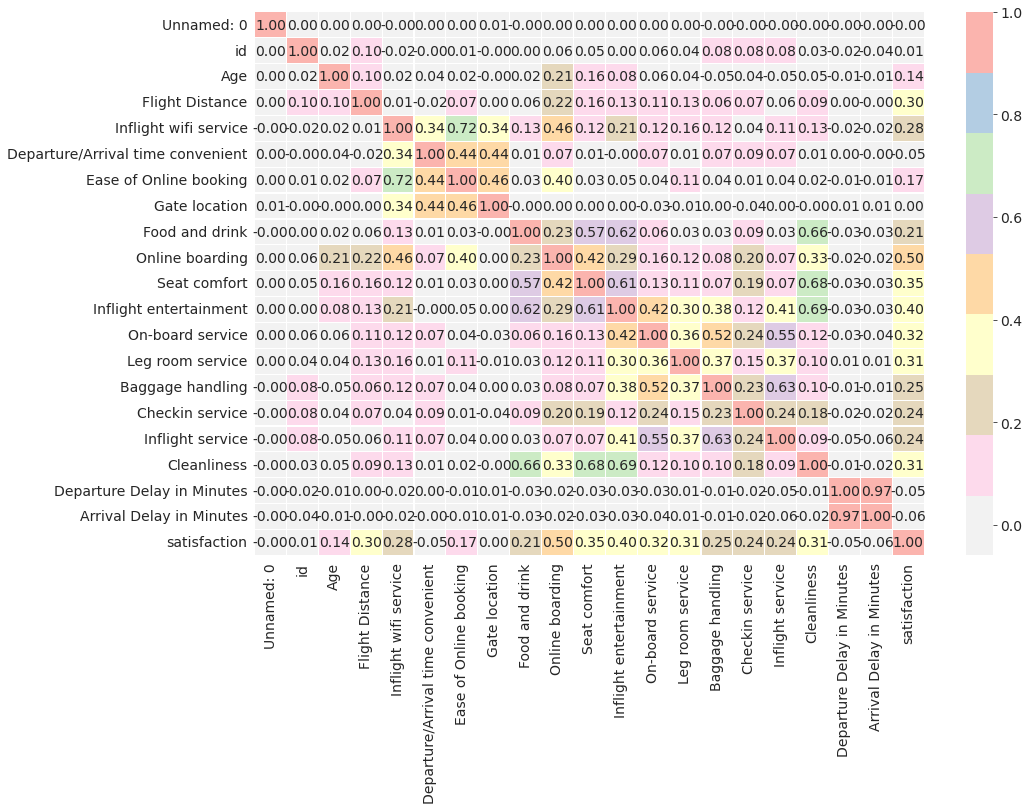

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot=True, linewidth=0.2, fmt=".2f", cmap="Pastel1_r");

# Summary
>These 14 columns show **positive correlation** with the target columns. 

>Some of the continuous data contains outliers, which we must be cautious of.

>According to the categorical columns in the input, the majority of passengers are **dissatisfied or neutral** with the service provided, which appears to be a major concern.

#Model creation

##Input columns and Target column
- dataset has 25 columns
- we'll use the last column (satisfaction) as the target column as it contains the category we need to predict

In [ ]:
# Our Input Columns
#we removed the first two columns since they are unnecessary for model creation
input_columns = list(df.columns)[2:-1]

In [ ]:
print(list(input_columns))

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [ ]:
# Our Target Column 

target_column = 'satisfaction'

In [ ]:
# Make a new dataframe of inputs column for training

inputs_df =df[input_columns].copy()

In [ ]:
# Check the shape of training dataset

inputs_df.shape

(103594, 22)

In [ ]:
# Make a new dataframe of target column for training

targets = df[target_column]

In [ ]:
# Check the shape of training dataset

targets.shape

(103594,)

In [ ]:
# Dataset with relvant columns only

inputs_df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Seat comfort  \
0                       3              1  ...             5   
1                       3              3  ...             1   
2                       2              2  ...             5   
3                       5              5  ...             2   
4                       3              3  ...             5   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 4                 3   
1                       1                 1                 5   
2                       5                 4                 3   
3                       2                 2                 5   
4                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  
0                          25                      18.0  
1                           1                       6.0  
2                           0                       0.0  
3                          11                       9.0  
4                           0                       0.0  

[5 rows x 22 columns]

In [ ]:
inputs_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [ ]:
# For Numerical Columns

numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Check numerical columns

numeric_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [ ]:
# For Categorical Columns

categorical_cols = inputs_df.select_dtypes(include=['object']).columns.tolist()

# Check categorical columns

categorical_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [ ]:
# Check length of both columns

len(list(categorical_cols)), len(list(numeric_cols))

(4, 18)

##Imputing and Scaling Numerical Data

Here we'll make an imputer for numerical column which will add numerical data from the missing values. Finally, the data will be scaled to make it more relevant.

In [ ]:
# Categories which contains 0 as Not Applicable

category_value_list = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

In [ ]:
# helper function to make them nan and then replace it
import numpy as np

def replace_not_applicable(inputs_df):
    for i in category_value_list:
        inputs_df[i].replace(0,np.nan, inplace=True)

replace_not_applicable(inputs_df)

In [ ]:
# Check for missing or nan values

missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Departure/Arrival time convenient    5290
Ease of Online booking               4473
Inflight wifi service                3096
Online boarding                      2420
Leg room service                      470
Food and drink                        105
Inflight entertainment                 14
Cleanliness                            12
Inflight service                        3
On-board service                        3
Gate location                           1
Seat comfort                            1
Checkin service                         1
dtype: int64

In [ ]:
# Importing Simple Imputer

from sklearn.impute import SimpleImputer

# Performing Simple Imputation
imputer = SimpleImputer(strategy='median')
imputer.fit(df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

In [ ]:
inputs_df[numeric_cols]

Age  Flight Distance  Inflight wifi service  \
0       13.0            460.0                    3.0   
1       25.0            235.0                    3.0   
2       26.0           1142.0                    2.0   
3       25.0            562.0                    2.0   
4       61.0            214.0                    3.0   
...      ...              ...                    ...   
103899  23.0            192.0                    2.0   
103900  49.0           2347.0                    4.0   
103901  30.0           1995.0                    1.0   
103902  22.0           1000.0                    1.0   
103903  27.0           1723.0                    1.0   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                     4.0                     3.0   
1                                     2.0                     3.0   
2                                     2.0                     2.0   
3                                     5.0                     5.0   
4                                     3.0                     3.0   
...                                   ...                     ...   
103899                                1.0                     2.0   
103900                                4.0                     4.0   
103901                                1.0                     1.0   
103902                                1.0                     1.0   
103903                                3.0                     3.0   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                 1.0             5.0              3.0           5.0   
1                 3.0             1.0              3.0           1.0   
2                 2.0             5.0              5.0           5.0   
3                 5.0             2.0              2.0           2.0   
4                 3.0             4.0              5.0           5.0   
...               ...             ...              ...           ...   
103899            3.0             2.0              2.0           2.0   
103900            4.0             2.0              4.0           5.0   
103901            3.0             4.0              1.0           5.0   
103902            5.0             1.0              1.0           1.0   
103903            3.0             1.0              1.0           1.0   

        Inflight entertainment  On-board service  Leg room service  \
0                          5.0               4.0               3.0   
1                          1.0               1.0               5.0   
2                          5.0               4.0               3.0   
3                          2.0               2.0               5.0   
4                          3.0               3.0               4.0   
...                        ...               ...               ...   
103899                     2.0               3.0               1.0   
103900                     5.0               5.0               5.0   
103901                     4.0               3.0               2.0   
103902                     1.0               4.0               5.0   
103903                     1.0               1.0               1.0   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                    4.0              4.0               5.0          5.0   
1                    3.0              1.0               4.0          1.0   
2                    4.0              4.0               4.0          5.0   
3                    3.0              1.0               4.0          2.0   
4                    4.0              3.0               3.0          3.0   
...                  ...              ...               ...          ...   
103899               4.0              2.0               3.0          2.0   
103900               5.0              5.0               5.0          4.0   
103901               4.0              5.0               5.0          4.0   
103902               1.0              5.0

In [ ]:
# Check again for missing values

inputs_df[numeric_cols].isna().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
# Importing MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

# Performing Scaling
scaler = MinMaxScaler()
scaler.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [ ]:
inputs_df[numeric_cols]

Age  Flight Distance  Inflight wifi service  \
0       0.076923         0.086632                   0.50   
1       0.230769         0.041195                   0.50   
2       0.243590         0.224354                   0.25   
3       0.230769         0.107229                   0.25   
4       0.692308         0.036955                   0.50   
...          ...              ...                    ...   
103899  0.205128         0.032512                   0.25   
103900  0.538462         0.467690                   0.75   
103901  0.294872         0.396607                   0.00   
103902  0.192308         0.195679                   0.00   
103903  0.256410         0.341680                   0.00   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                    0.75                    0.50   
1                                    0.25                    0.50   
2                                    0.25                    0.25   
3                                    1.00                    1.00   
4                                    0.50                    0.50   
...                                   ...                     ...   
103899                               0.00                    0.25   
103900                               0.75                    0.75   
103901                               0.00                    0.00   
103902                               0.00                    0.00   
103903                               0.50                    0.50   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                0.00            1.00             0.50          1.00   
1                0.50            0.00             0.50          0.00   
2                0.25            1.00             1.00          1.00   
3                1.00            0.25             0.25          0.25   
4                0.50            0.75             1.00          1.00   
...               ...             ...              ...           ...   
103899           0.50            0.25             0.25          0.25   
103900           0.75            0.25             0.75          1.00   
103901           0.50            0.75             0.00          1.00   
103902           1.00            0.00             0.00          0.00   
103903           0.50            0.00             0.00          0.00   

        Inflight entertainment  On-board service  Leg room service  \
0                         1.00              0.75              0.50   
1                         0.00              0.00              1.00   
2                         1.00              0.75              0.50   
3                         0.25              0.25              1.00   
4                         0.50              0.50              0.75   
...                        ...               ...               ...   
103899                    0.25              0.50              0.00   
103900                    1.00              1.00              1.00   
103901                    0.75              0.50              0.25   
103902                    0.00              0.75              1.00   
103903                    0.00              0.00              0.00   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                   0.75             0.75              1.00         1.00   
1                   0.50             0.00              0.75         0.00   
2                   0.75             0.75              0.75         1.00   
3                   0.50             0.00              0.75         0.25   
4                   0.75             0.50              0.50         0.50   
...                  ...              ...               ...          ...   
103899              0.75             0.25              0.50         0.25   
103900              1.00             1.00              1.00         0.75   
103901              0.75             1.00              1.00         0.75 

##Encoding Categorical data

In [ ]:
# Importing One Hot Encoder

from sklearn.preprocessing import OneHotEncoder

# Performing One Hot Encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
inputs_df[encoded_cols]

Gender_Female  Gender_Male  Customer Type_Loyal Customer  \
0                 0.0          1.0                           1.0   
1                 0.0          1.0                           0.0   
2                 1.0          0.0                           1.0   
3                 1.0          0.0                           1.0   
4                 0.0          1.0                           1.0   
...               ...          ...                           ...   
103899            1.0          0.0                           0.0   
103900            0.0          1.0                           1.0   
103901            0.0          1.0                           0.0   
103902            1.0          0.0                           0.0   
103903            0.0          1.0                           1.0   

        Customer Type_disloyal Customer  Type of Travel_Business travel  \
0                                   0.0                             0.0   
1                                   1.0                             1.0   
2                                   0.0                             1.0   
3                                   0.0                             1.0   
4                                   0.0                             1.0   
...                                 ...                             ...   
103899                              1.0                             1.0   
103900                              0.0                             1.0   
103901                              1.0                             1.0   
103902                              1.0                             1.0   
103903                              0.0                             1.0   

        Type of Travel_Personal Travel  Class_Business  Class_Eco  \
0                                  1.0             0.0        0.0   
1                                  0.0             1.0        0.0   
2                                  0.0             1.0        0.0   
3                                  0.0             1.0        0.0   
4                                  0.0             1.0        0.0   
...                                ...             ...        ...   
103899                             0.0             0.0        1.0   
103900                             0.0             1.0        0.0   
103901                             0.0             1.0        0.0   
103902                             0.0             0.0        1.0   
103903                             0.0             1.0        0.0   

        Class_Eco Plus  
0                  1.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
103899             0.0  
103900             0.0  
103901             0.0  
103902             0.0  
103903             0.0  

[103594 rows x 9 columns]

In [ ]:
# Importing  Train Test Split
from sklearn.model_selection import train_test_split

# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

In [ ]:
# Checking the size of our splitted data

train_inputs.shape, val_inputs.shape, train_targets.shape, val_targets.shape 

((77695, 27), (25899, 27), (77695,), (25899,))

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
inputs_df.drop(['Arrival Delay in Minutes'], axis="columns", inplace=True )

In [ ]:
x= inputs_df[numeric_cols + encoded_cols]
y=df[target_column]

In [ ]:
# Train Test Split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8, random_state=2)

In [ ]:
# Using LogisticRegression
model=LogisticRegression(max_iter=1000)

In [ ]:
# Train Model
model.fit(xtrain,ytrain)

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "Linear SVC" : LinearSVC()}


In [ ]:
def fit_and_score(models, train_inputs, val_inputs, train_targets, val_targets):
    model_scores = {}   
    #Loop through models
    for name, model in models.items():
          # Fit the model
        model.fit(train_inputs, train_targets)
        #Evaluate the model
        model_scores[name] = model.score(val_inputs, val_targets)
        
        return model_scores

In [ ]:
%%time

# Train all models and saving their score
np.random.seed(42)
model_scores = fit_and_score(models, train_inputs, val_inputs, train_targets, val_targets);

CPU times: user 1.75 s, sys: 842 ms, total: 2.59 s
Wall time: 1.34 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Checking scores for different models

model_scores

{'Logistic Regression': 0.885980153673887}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



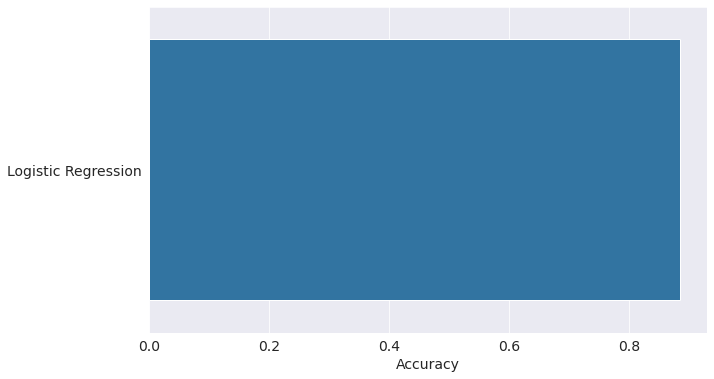

In [ ]:
# Plotting bar graph out of the model scores

model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
sns.barplot(model_compare.T['Accuracy'], model_compare.T.index, orient="h", );

In [ ]:
# Rearranging the scores

model_compare.T.sort_values(by="Accuracy",ascending=False)

Accuracy
Logistic Regression   0.88598

#Evaluation

In [ ]:
# Score of model

model_compare.T.sort_values(by="Accuracy",ascending=False)

Accuracy
Logistic Regression   0.88598

In [ ]:
# Score of Best Three models

final_score_df = model_scores
final_score_df

{'Logistic Regression': 0.885980153673887}